# **Trabajo Practico 1: Modelos Predictivos**

*Lorenzo Nascimbene & Federico Zafran*


# Importacion de Librerias


In [45]:
import pandas as pd
import seaborn as sns

# Punto 1:
Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [46]:
Bangalore_df = pd.read_csv("Bangalore.csv")

In [47]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [48]:
Bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


Elegimos este dataset, el cual cuenta con ls requisitos. Tiene mas de 5 atributos numéricos y 1 categórico.También cuenta con mas de 1000 y menos de 10000 muestras.

Vamos a predecir el precio.

In [49]:
Bangalore_df = Bangalore_df[["Location", "Price", "Area", "No. of Bedrooms","Gymnasium", "SwimmingPool","24X7Security", "CarParking",]]
Bangalore_df.head()

,Location,Price,Area,No. of Bedrooms,Gymnasium,SwimmingPool,24X7Security,CarParking
0,JP Nagar Phase 1,30000000,3340,4,1,1,1,0
1,Dasarahalli on Tumkur Road,7888000,1045,2,1,1,1,1
2,Kannur on Thanisandra Main Road,4866000,1179,2,1,1,1,0
3,Doddanekundi,8358000,1675,3,0,0,0,0
4,Kengeri,6845000,1670,3,1,1,1,1


# Punto 2:

Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

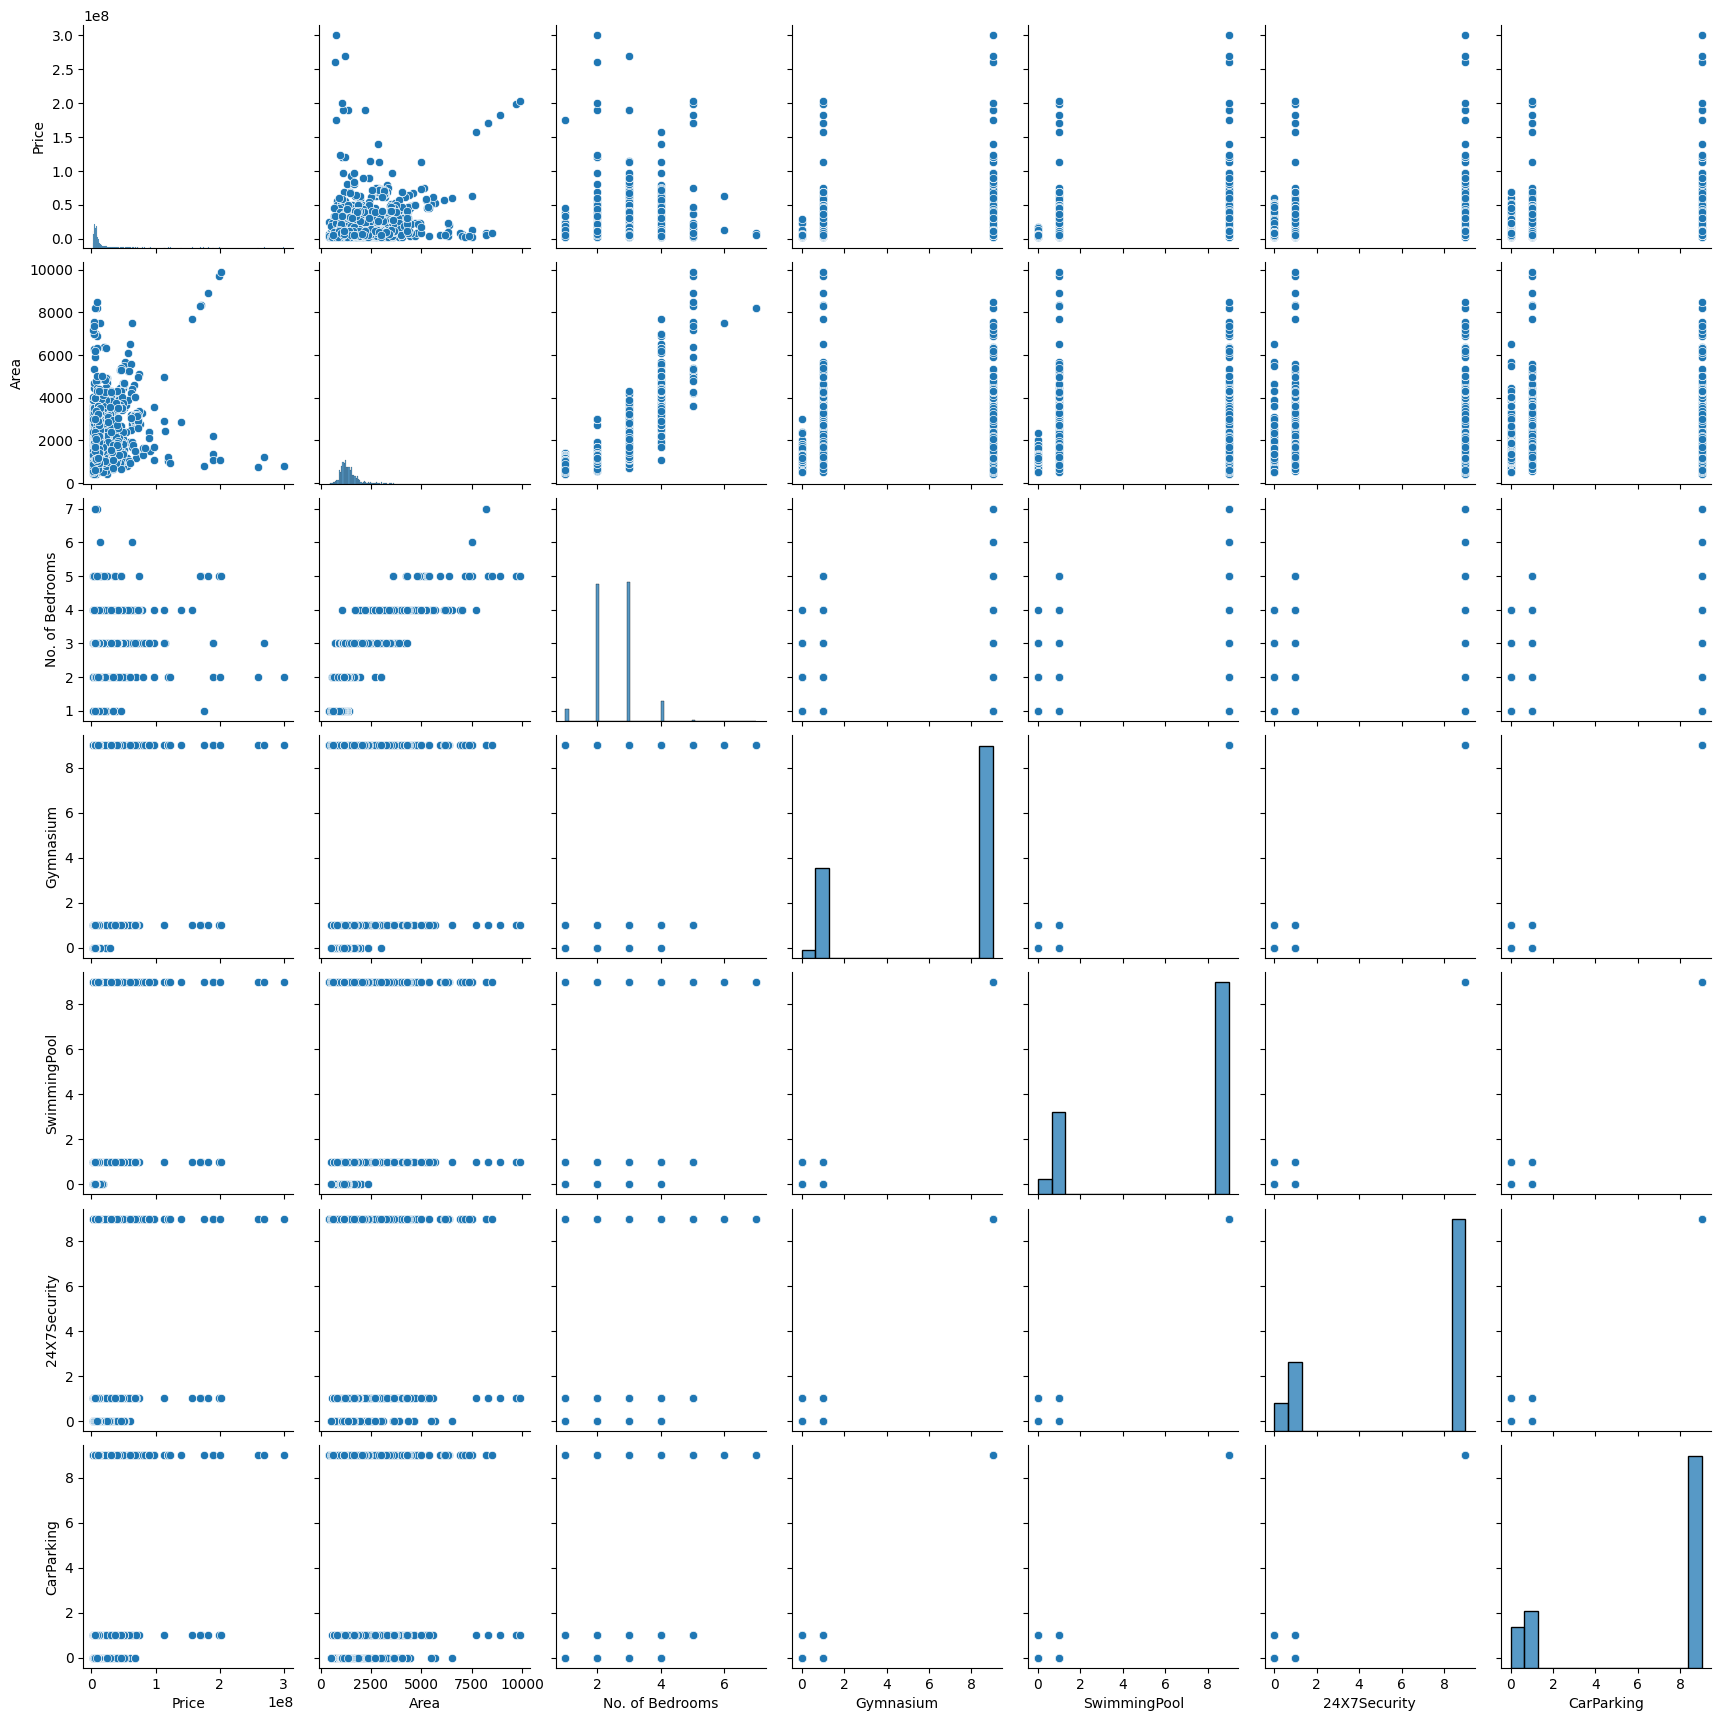

In [50]:
sns.pairplot(Bangalore_df)

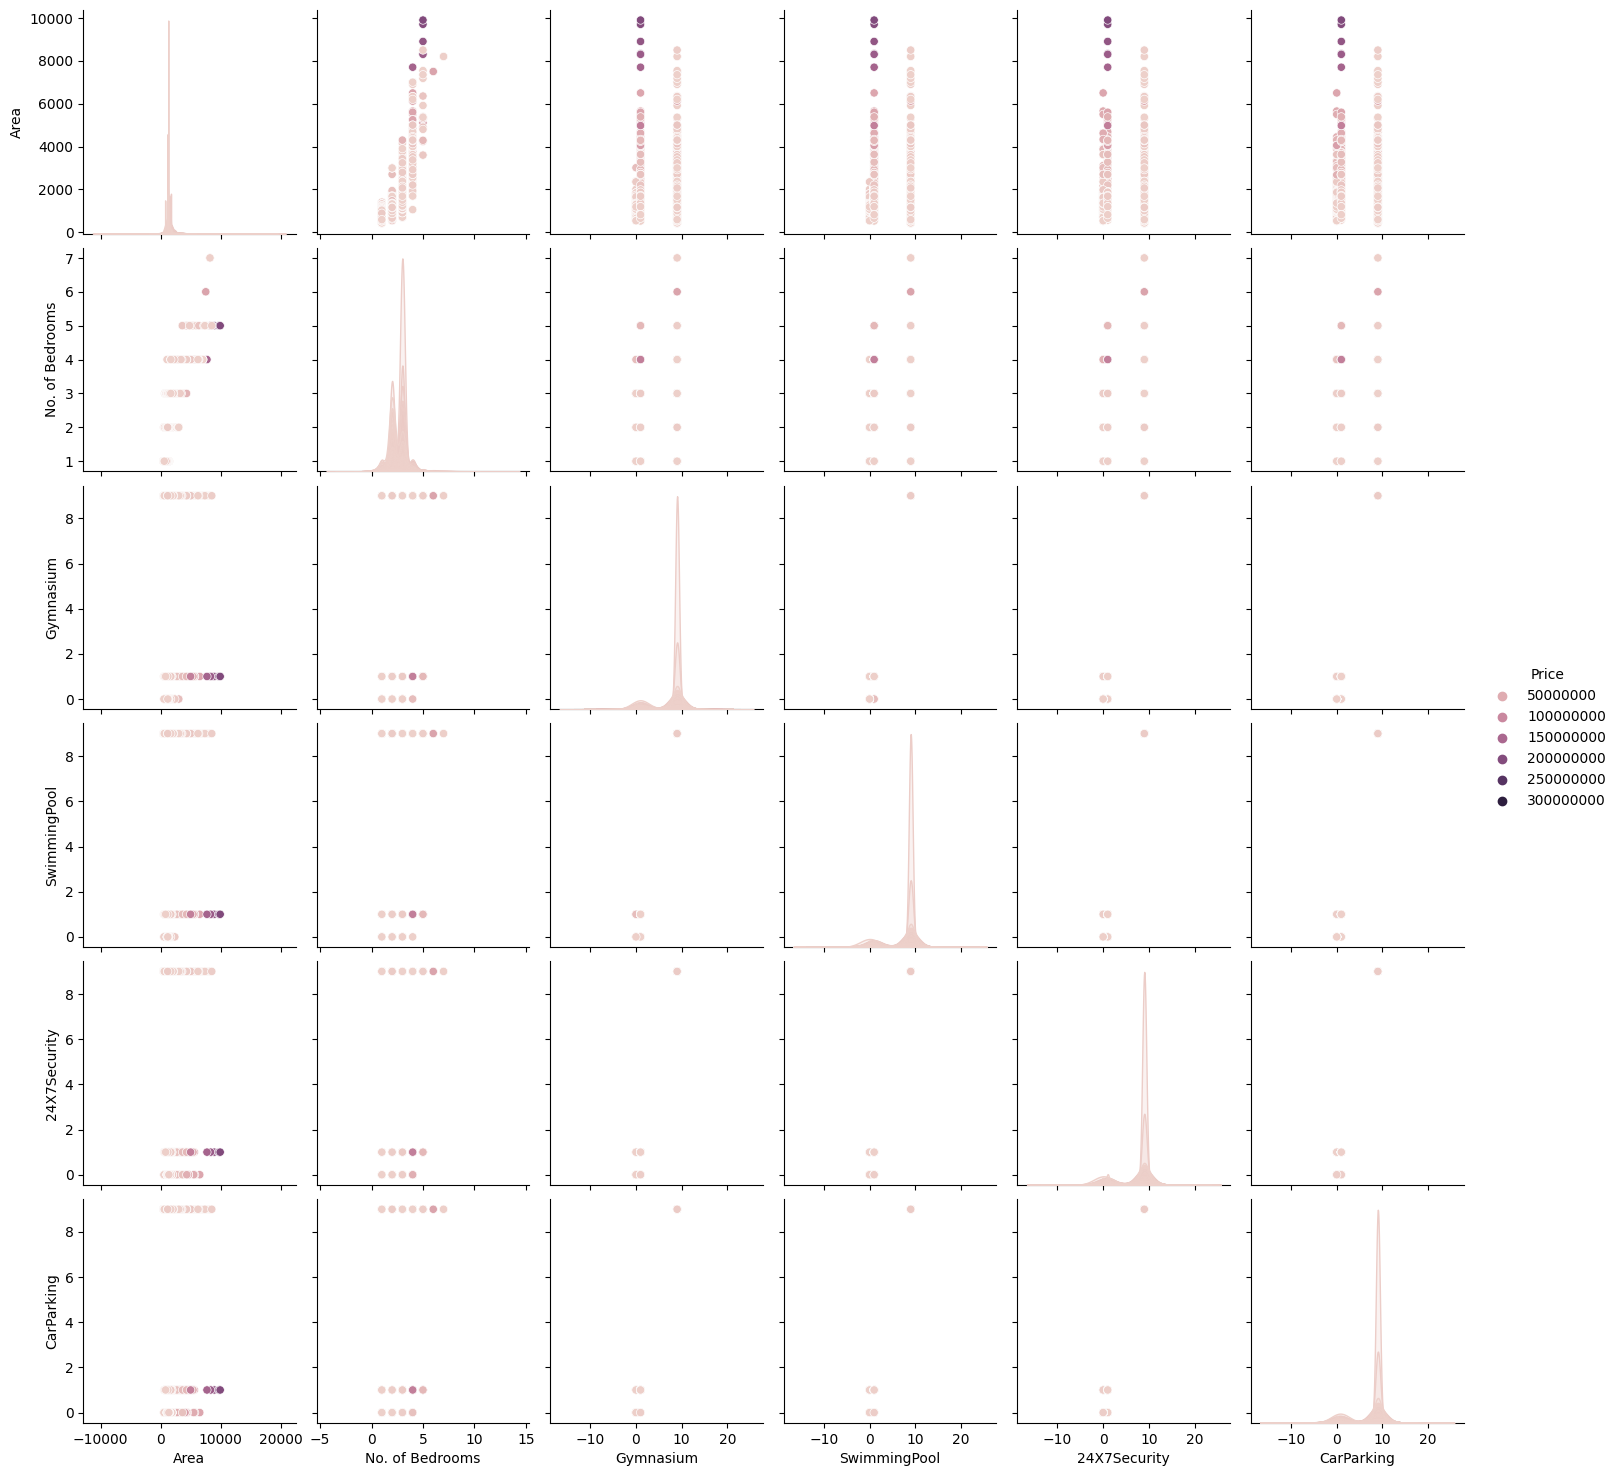

In [ ]:
sns.pairplot(Bangalore_df, hue="Price")

KeyboardInterrupt: 

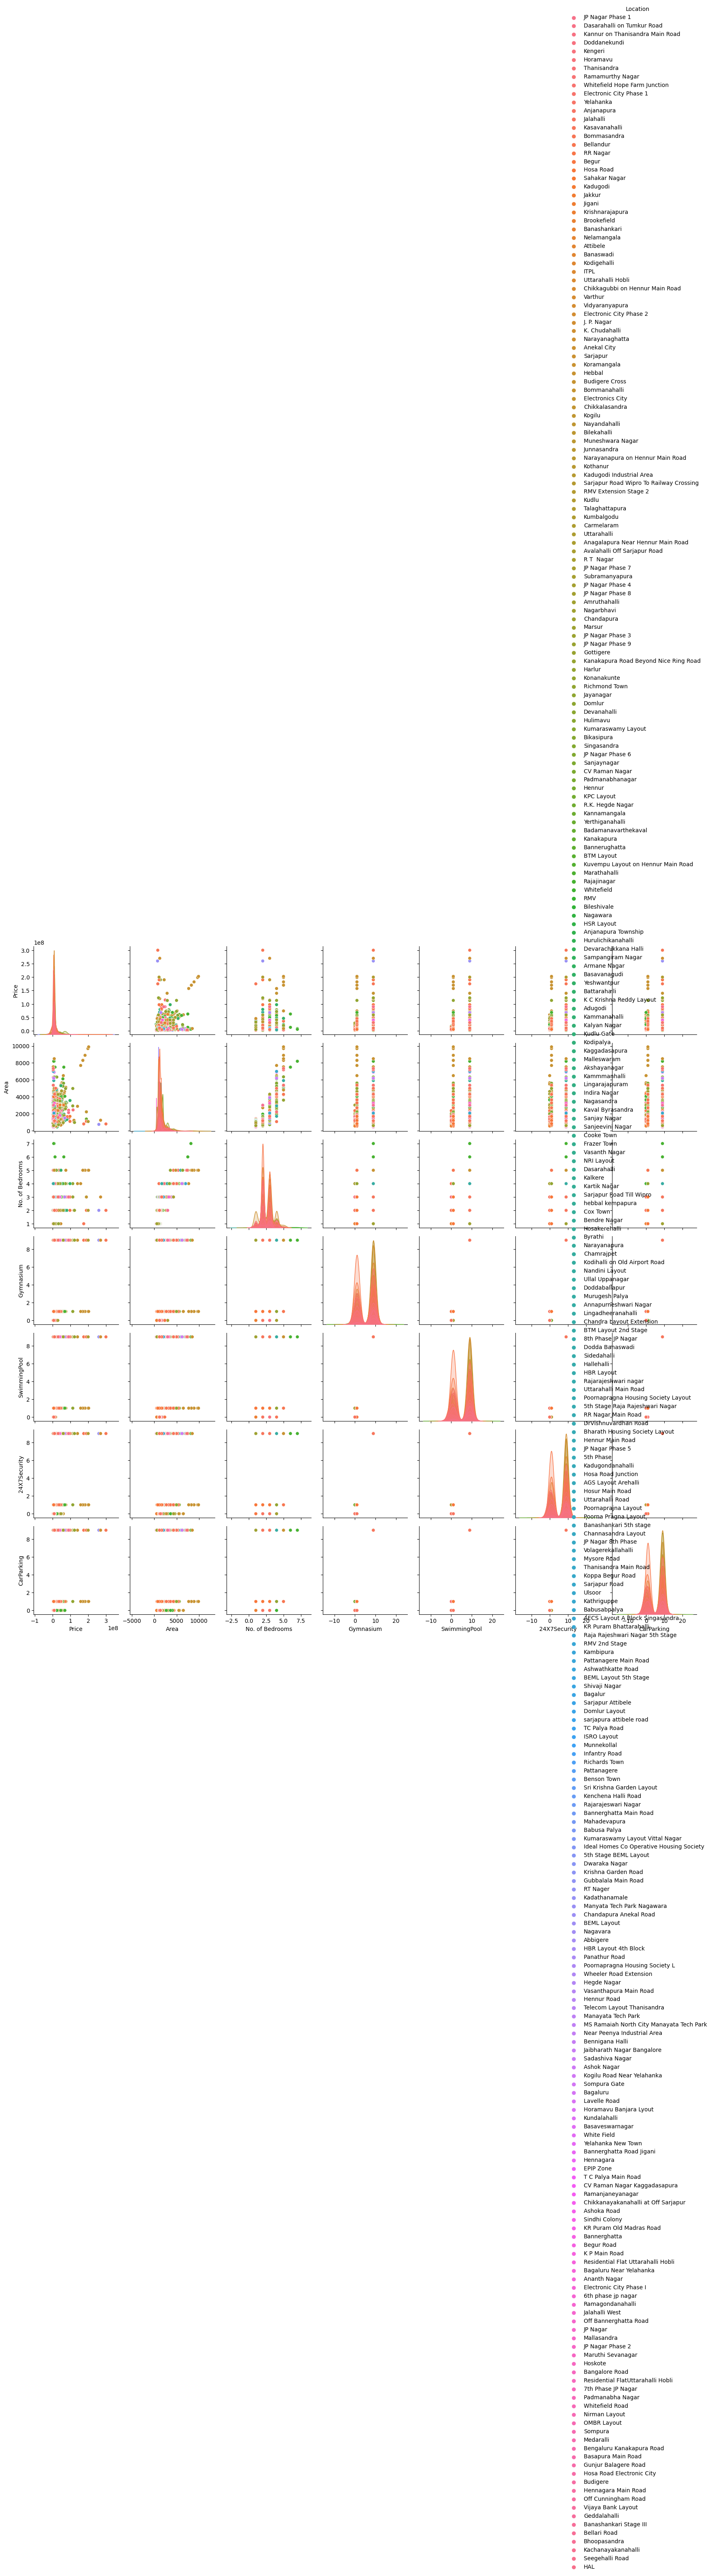

In [ ]:
sns.pairplot(Bangalore_df, hue="Location")

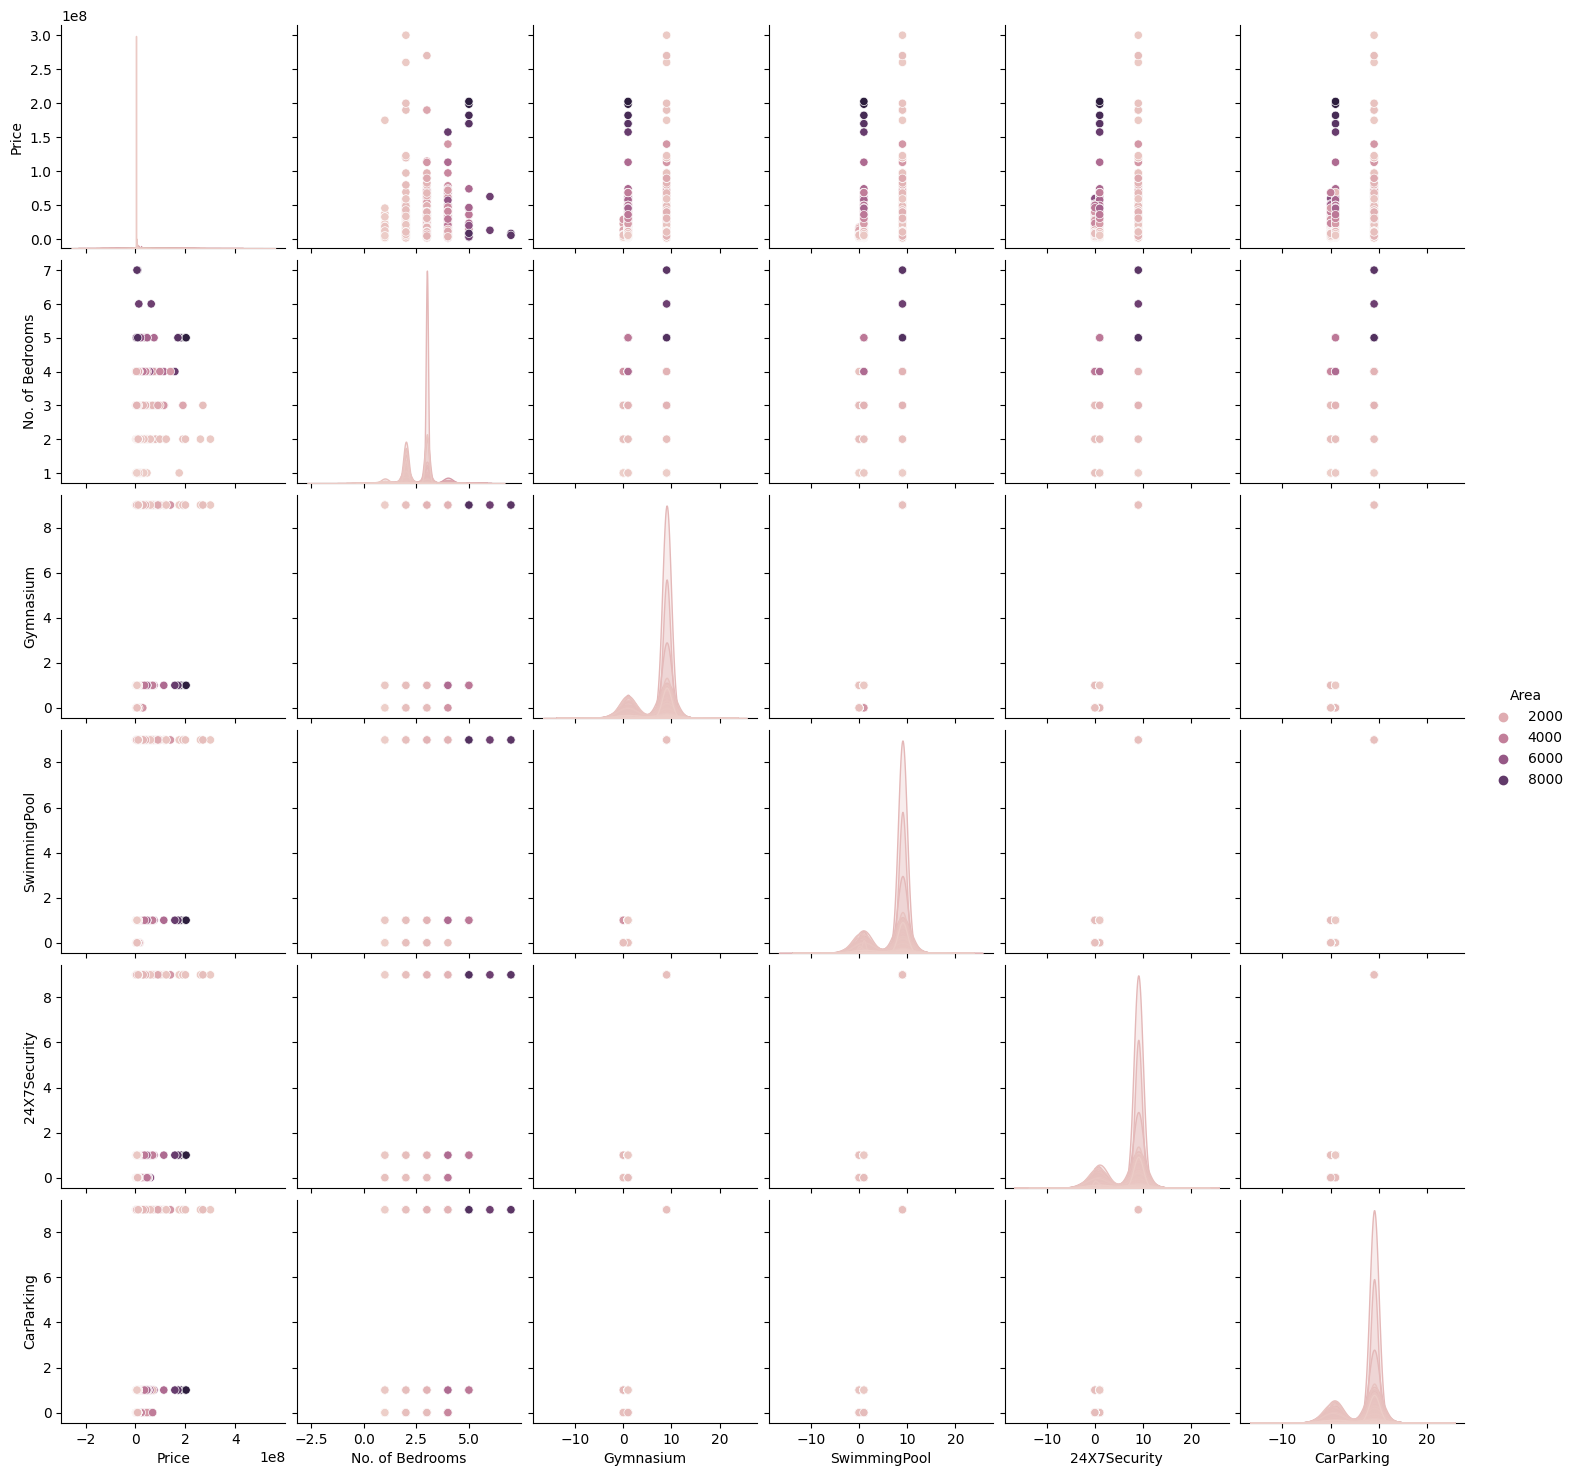

In [ ]:
sns.pairplot(Bangalore_df, hue="Area")

# Punto 3:

Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.



In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
Bangalore_df['Location'] = le.fit_transform(Bangalore_df['Location'])

# Punto 4
Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test, train = train_test_split(Bangalore_df, test_size=0.25)

In [ ]:
test.head()

,Location,Price,Area,No. of Bedrooms,Gymnasium,SwimmingPool,24X7Security,CarParking
5496,92,5222000,1505,3,9,9,9,9
1056,12,3911000,954,2,1,0,0,0
2678,187,6533000,1135,2,9,9,9,9
2861,252,67800000,3035,3,9,9,9,9
1640,141,6612000,1284,2,1,1,0,1


# Punto 5
Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.
Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = train.drop("Price", axis=1)
y_train = train["Price"]
X_test = test.drop("Price", axis=1)
y_test = test["Price"]

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(reg, X_test,y_test)

array([0.15528924, 0.17847034, 0.00328442, 0.35572583, 0.15570795])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_test, y_test, cv=10)

array([ 0.25298998, -0.12019822, -0.34509346, -1.35672146, -0.30980446,
       -1.35471922,  0.37835544,  0.58279772,  0.20455742, -0.04506965])

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?
Respuesta: Evaluamos los resultados de cada árbol de decisión de acerdo a su performance que se da con el score

# Punto 6
Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.
Responder las mismas preguntas que en el punto 5 para este caso.

In [ ]:
X_train = train.drop("Location", axis=1)
y_train = train["Location"]
X_test = test.drop("Location", axis=1)
y_test = test["Location"]

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
RegresionLogistica = LogisticRegression(random_state=0)
RegresionLogistica.fit(X_train, y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
prediccion_y = RegresionLogistica.predict(X_test)

In [ ]:
score : float = accuracy_score(y_test, prediccion_y)
score

0.011600429645542427

Arbol de decision

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [53]:
prmtrs : dict = {
    "max_depth" : [2,4,8,9],
    "min_samples_split" : [6,12,24,48,96,192],
    "min_samples_leaf" : [6,12,24,48,96,192],
    "criterion" : ["gini", "entropy"]
}

In [52]:
PinoSilvestre : DecisionTreeClassifier = DecisionTreeRegressor()

In [59]:
RS= RandomizedSearchCV(PinoSilvestre, prmtrs, cv=5)
RS.fit(x_train, y_train)

NameError: name 'x_train' is not defined

# Punto 7
Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?



# Punto 8 (Conclusion)
Escribir una conclusión sobre el trabajo realizado.

